# Handwiritten digit classification model - Streamlit workshop

The dataset is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9. If you are new to machine learning I highly recommend watching the following [video](https://www.youtube.com/watch?v=aircAruvnKk).

In [ ]:
%pip install numpy matplotlib tensorflow

In [18]:
import numpy as np # necessary for working with arrays
import matplotlib.pyplot as plt # necessary for visulisation of digits
import tensorflow as tf # necessary for creating machine learning model

### Preparing data

Here we download existing data for our machine learning model. The data includes handwritten digits and their correspondent label. We divide the dataset into training and testing data. 

Training data:
Portion of the dataset that is fed into the machine learning model in order to discover and learn patterns, i.e. to train our model. 

Testing data:
Once machine learning model is built (with training data), an unseen dataset is required to test the model. This is the testing data, which is used to evaluate the performance of the algorithms’ training and to adjust or optimize it for improved results. 

Additionally the data needs to be divided into X and Y, which represent the hadndrawn digit and the corresponding label (see example further below).



In [19]:
# load existing dataset from the tensorflow package
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f'The number of training samples is {len(x_train):,}')
print(f'The number of test samples is {len(x_test):,}')

The number of training samples is 60,000
The number of test samples is 10,000


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive. Let's plot the digit and the corresponding label of thr first 10 items of the dataset:

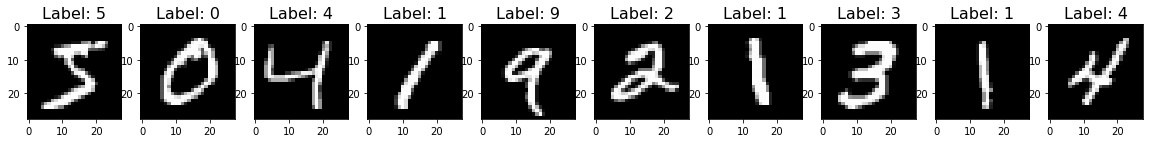

In [20]:
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, 10):
  sample = x_train[i]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(y_train[i]), fontsize=16)

Now let's get some infromation on the handwritten digits that were used to train this model. We will have to use the same type of data as input for the model later on.

In [21]:
array_dataset = x_train[4]
np.info(array_dataset)

print(f"The maximum value is {np.max(array_dataset)} and the minimum value is {np.min(array_dataset)}")

class:  ndarray
shape:  (28, 28)
strides:  (28, 1)
itemsize:  1
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x110aec40
byteorder:  little
byteswap:  False
type: uint8
The maximum value is 255 and the minimum value is 0


Now we start building the neural network architecture for our machine learning model. In this network we have 1 input layer, 4 hidden layers and 1 output layer. The layer setup and number of neurons is kind of a arbitrary choice. In practice, there’s a lot of room to experiment with the specific structure. In this case I chose a neural network model architecture that I found online.

Here is some information on how to build and experiment with your model architecture:

[Simple guide to choosing model architecture](https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37) 
[Comprehensive: Choosing Number of Layers and Nodes](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/) 
[Comprehensive: Choosing ativation function](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/) 



The model type or this is our neural network model architecture that we will be using is Sequential. Sequential is the easiest way to build a model in tensorflow. It allows you to build a model layer by layer. Here we define each layer:

In [22]:
model = tf.keras.Sequential()

# this is the input layer which flattens our input into one line (2D image arrays into 1D), where each neuron represents a pixel from our digit image
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))

# here we add the hidden layer of our model
model.add(tf.keras.layers.Dense(300, activation='relu'))  # rectify linear unit (relu) is default recommended activation function
# this means 20% of the neurons will be deactivated during training, which prevents overfitting
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

# this is the output layer, which has 10 unit, which represent individual digits: 0, 1, 2, ... 9
model.add(tf.keras.layers.Dense(10, activation='softmax')) # softmax make sure all neuron values add up to 1, which reprsents the confidence or how likely it is the drawn number is that digit

Next we compile (build) our model archutecture and output a summary of our model:


In [23]:
# combines all layers
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0003),
              metrics=['accuracy'])

# shows the model structure including layers and output shape
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                15050     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 251,060
Trainable params: 251,060
Non-tr

Once our model is ready we can start the training of our model:

In [24]:
batch_size = 32 # how many images get digested by the model at a time
epochs = 20 # one epoch is when an ENTIRE dataset is passed forward and backward through the neural network onc.
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 3.7082 - accuracy: 0.2262
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7687 - accuracy: 0.3740
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4434 - accuracy: 0.5008
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2719 - accuracy: 0.5616
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1179 - accuracy: 0.6107
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9345 - accuracy: 0.6839
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7561 - accuracy: 0.7483
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6377 - accuracy: 0.7811
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5098 - accuracy: 0.8399
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4

Now that our model has been trained we can look at It's performance and save It. 

In [25]:
# calculate accuracy and 
model.evaluate(x_test, y_test)

# the SavedModel format is a way to serialize models, so that they can be restored later using tf.keras.models.load_model
model.save('digit_classifier_model/digit_classifier.model')

313/313 [==============================] - 1s 2ms/step - loss: 0.1659 - accuracy: 0.9735
INFO:tensorflow:Assets written to: digit_classifier_model/digit_classifier.model/assets
